<a href="https://colab.research.google.com/github/kurt980/527_project/blob/main/527_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [234]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [213]:
df = pd.read_csv('/content/sample_data/box_score.csv')
df = df.dropna(axis=0)
df_1 = df.sample(1000).loc[:,~df.columns.isin(['GAME_DATE', 'MATCH_UP', 'TEAM', 'MIN', 'REB', 'PD','FTA','FGA','TPA'])]
df_1['W_L'] = pd.get_dummies(df_1['W_L'])['W']
x_1 = df_1.loc[:,df_1.columns != 'W_L'].reset_index(drop = True) 
x_1norm = (x_1 - x_1.mean()) / (x_1.max() - x_1.min())
x_1[x_1norm.columns] = x_1norm
y_1 = df_1.loc[:,df_1.columns == 'W_L'].reset_index(drop = True)
y_1 = y_1['W_L']

In [285]:
df.head(5)

,TEAM,MATCH_UP,GAME_DATE,W_L,MIN,PTS,FGM,FGA,FG,TPM,...,FT,OREB,DREB,REB,AST,TOV,STL,BLK,PF,PD
0,LAC,LAC @ MIA,12/8/2022,L,48,110,37,80,46.3,17,...,90.5,7,36,43,24,16,3,3,16,-5
1,SAS,SAS vs. HOU,12/8/2022,W,48,118,46,83,55.4,13,...,86.7,7,31,38,25,17,5,7,19,9
2,POR,POR vs. DEN,12/8/2022,L,48,120,44,91,48.4,16,...,100.0,13,25,38,30,13,10,3,20,-1
3,DEN,DEN @ POR,12/8/2022,W,48,121,47,91,51.6,12,...,68.2,16,32,48,28,16,6,5,16,1
4,HOU,HOU @ SAS,12/8/2022,L,48,109,44,98,44.9,10,...,73.3,16,26,42,23,14,3,4,19,-9


In [350]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(x_1))

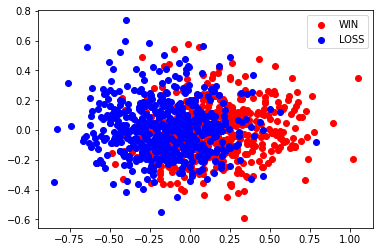

In [351]:
# Visualize PCA results
plt.scatter(transformed[y_1==1][0], transformed[y_1==1][1], label='WIN', c='red')
plt.scatter(transformed[y_1==0][0], transformed[y_1==0][1], label='LOSS', c='blue')

plt.legend()
plt.show()

Logistic Regression

In [214]:
# split train and test by 4:1
x_train, x_test, y_train, y_test = train_test_split(x_1,y_1,test_size=0.2)
# x_train['Intercept'], x_test['Intercept'] = 1, 1 

In [215]:
log_reg = sm.Logit(y_train, x_train).fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [216]:
accuracy_score(y_test, list(map(round, log_reg.predict(x_test))))

0.825

In [ ]:
# run 10 batches

In [ ]:
print(log_reg.summary())

Polynomial Logistic

In [373]:
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias = True)
x_poly = poly.fit_transform(x_train.loc[:,x_train.columns != 'Intercept'])
x_poly.shape

(800, 120)

In [374]:
log_reg_poly = sm.Logit(y_train, x_poly).fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 9


/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [ ]:
print(log_reg_poly.summary())

In [376]:
accuracy_score(y_test, list(map(round, log_reg_poly.predict(poly.fit_transform(x_test.loc[:,x_train.columns != 'Intercept'])))))

0.82

In [ ]:
# run 10 batches

Advanced Statistics

In [224]:
dfa = pd.read_csv('/content/sample_data/advanced_box_score_2023.csv', encoding='latin-1')
dfa['W/L'] = pd.get_dummies(dfa['W/L'])['W']
dfa_1 = dfa.loc[:,~dfa.columns.isin(['TEAM','MATCH_UP','GAME_DATE','MIN','OFFRTG','DEFRTG','NETRTG','PIE'])]
dfa_1 = dfa_1.dropna()

xa_1 = dfa_1.loc[:,dfa_1.columns != 'W/L'].reset_index(drop = True) 
xa_n = (xa_1 - xa_1.mean()) / (xa_1.max() - xa_1.min())
xa_1[xa_n.columns] = xa_n
ya_1 = dfa_1.loc[:,dfa_1.columns == 'W/L'].reset_index(drop = True)
ya_1 = ya_1['W/L']

In [286]:
dfa.head(5)

,TEAM,MATCH_UP,GAME_DATE,W/L,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,ASTRAT,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE
0,DAL,DAL @ DEN,12/6/2022,1,48.0,118.4,117.3,1.0,75.0,1.59,20.5,18.4,76.2,48.8,17.3,61.8,67.7,98.0,50.3
1,DEN,DEN vs. DAL,12/6/2022,0,48.0,117.3,118.4,-1.0,75.0,1.76,22.1,23.8,81.6,51.3,17.3,59.6,63.7,98.0,49.7
2,CLE,CLE vs. LAL,12/6/2022,1,48.0,117.2,103.0,14.1,52.1,3.13,18.5,26.7,68.5,49.5,8.1,55.4,57.7,99.0,60.1
3,MIA,MIA vs. DET,12/6/2022,0,48.0,100.0,122.1,-22.1,63.6,1.40,16.4,23.9,73.9,48.9,15.6,49.4,54.3,95.5,41.7
4,LAL,LAL @ CLE,12/6/2022,0,48.0,103.0,117.2,-14.1,42.1,1.00,12.1,31.5,73.3,50.5,16.2,46.1,51.2,99.0,39.9


In [225]:
# split train and test by 4:1
xa_train, xa_test, ya_train, ya_test = train_test_split(xa_1,ya_1,test_size=0.2)

In [282]:
xa_train['Intercept'] = 1
xa_test['Intercept'] = 1

In [283]:
log_reg_a = sm.Logit(ya_train, xa_train.astype(float)).fit()
print(log_reg_a.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    W/L   No. Observations:                 2570
Model:                          Logit   Df Residuals:                     2559
Method:                           MLE   Df Model:                           10
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                     inf
Time:                        09:25:12   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
AST%           3.2346      1.218      2.656      0.008       0.848       5.622
AST/TO         2.3960      1.731  

/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [284]:
accuracy_score(ya_test, list(map(round, log_reg_a.predict(xa_test))))

0.8087091757387247

In [ ]:
# run 10 batches


Four Factors

In [42]:
df40 = pd.read_csv('/content/sample_data/four_factors.csv')
df40 = df40.dropna()
df40 = df40.rename(columns = {'DATE':'GAME_DATE'})
df4 = df40.loc[:,~df40.columns.isin(['TEAM','MATCH','GAME','GAME_DATE','MIN'])]
df4.columns = ['HOME',	'W_L',	'EFG',	'FTR',	'TOV',	'OREB',	'OPPEFG',	'OPPFTR',	'OPPTOV',	'OPPOREB']
df4['W_L'] = pd.get_dummies(df4['W_L'])['W']
df4['HOME'] = pd.get_dummies(df4['HOME'])['vs.']

<ipython-input-42-75b51c4218a8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['W_L'] = pd.get_dummies(df4['W_L'])['W']
<ipython-input-42-75b51c4218a8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['HOME'] = pd.get_dummies(df4['HOME'])['vs.']


In [ ]:
df4.head(5)

In [230]:
x4 = df4.loc[:,df4.columns != 'W_L'].reset_index(drop = True) 
x4_n = (x4 - x4.mean()) / (x4.max() - x4.min())
x4[x4_n.columns] = x4_n

y4 = df4.loc[:,df4.columns == 'W_L'].reset_index(drop = True)
# split train and test by 4:1
x4_train, x4_test, y4_train, y4_test = train_test_split(x4,y4,test_size=0.2)

In [ ]:
log_reg_4_1 = smf.logit(formula="W_L ~ EFG	+ FTR + TOV	+ OREB + OPPEFG + OPPFTR + OPPTOV + OPPOREB + C(HOME)", data=pd.concat([y4_train,x4_train], axis=1)).fit()
print(log_reg_4_1.summary())

In [289]:
accuracy_score(y4_train, list(map(round, log_reg_4_1.predict(x4_train))))

0.9434477379095164

In [ ]:
mean4 = []
for i in range(10):
  batch = df4.sample(1000)

  x4b = batch.loc[:,batch.columns != 'W_L'].reset_index(drop = True) 
  x4_nb = (x4b - x4b.mean()) / (x4b.max() - x4b.min())
  x4b[x4_nb.columns] = x4_nb

  y4b = batch.loc[:,batch.columns == 'W_L'].reset_index(drop = True)
  # split train and test by 4:1
  x4b_train, x4b_test, y4b_train, y4b_test = train_test_split(x4b,y4b,test_size=0.2)

  log_reg_4_b = smf.logit(formula="W_L ~ EFG	+ FTR + TOV	+ OREB + OPPEFG + OPPFTR + OPPTOV + OPPOREB + C(HOME)", data=pd.concat([y4b_train,x4b_train], axis=1)).fit()
  
  mean4.append(accuracy_score(y4b_train, list(map(round, log_reg_4_b.predict(x4b_train)))))


In [ ]:
mean4

3206

Quantile Regression

In [ ]:

 
# fit the model
model = smf.quantreg('Emission ~ Distance',
                     df).fit(q=0.7)
 
# view model summary


In [181]:
df_p0

,TEAM,MATCH_UP,GAME_DATE,W_L,MIN,PTS,FGM,FGA,FG,TPM,...,DREB,REB,AST,TOV,STL,BLK,PF,PD,AWAYPTS,PWP
0,LAC,LAC @ MIA,12/8/2022,L,48,110,37,80,46.3,17,...,36,43,24,16,3,3,16,-5,115,0.324437
1,SAS,SAS vs. HOU,12/8/2022,W,48,118,46,83,55.4,13,...,31,38,25,17,5,7,19,9,109,0.787355
2,POR,POR vs. DEN,12/8/2022,L,48,120,44,91,48.4,16,...,25,38,30,13,10,3,20,-1,121,0.465821
3,DEN,DEN @ POR,12/8/2022,W,48,121,47,91,51.6,12,...,32,48,28,16,6,5,16,1,120,0.534179
4,HOU,HOU @ SAS,12/8/2022,L,48,109,44,98,44.9,10,...,26,42,23,14,3,4,19,-9,118,0.212645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3207,SAS,SAS @ DET,1/1/2022,L,53,116,42,102,41.2,12,...,35,48,30,17,8,3,27,-1,117,0.464651
3208,UTA,UTA vs. GSW,1/1/2022,L,48,116,40,92,43.5,14,...,30,45,19,13,7,0,21,-7,123,0.275518
3209,CHI,CHI @ WAS,1/1/2022,W,48,120,41,84,48.8,17,...,38,44,17,15,4,4,24,1,119,0.534464
3210,HOU,HOU vs. DEN,1/1/2022,L,48,111,37,85,43.5,16,...,23,36,20,18,10,4,24,-13,124,0.138549


Points Differential

In [180]:
df_p0 = pd.read_csv('/content/sample_data/box_score.csv')
df_p0 = df_p0.dropna(axis=0)
df_p0 = df_p0.rename(columns = {'DATE':'GAME_DATE'})
df_p = df_p0.loc[:,~df_p0.columns.isin(['GAME_DATE', 'MATCH_UP', 'TEAM', 'MIN', 'REB', 'W_L'])]
df_p = df_p[df_p['PD'] > 0]

x_p = df_p.loc[:,df_p.columns != 'PD'].reset_index(drop = True) 
x_pnorm = (x_p - x_p.mean()) / (x_p.max() - x_p.min())
x_p[x_pnorm.columns] = x_pnorm
y_p = df_p.loc[:,df_p.columns == 'PD'].reset_index(drop = True)
df_p[x_pnorm.columns] = x_pnorm

27

In [107]:
len(df_p) #.head(5)

1606

In [ ]:
plt.hist(df_p['PD'], 100)

In [ ]:
# fit the model
q_pd = smf.quantreg('PD ~ PTS+FGM+FG+TP+FTM+FT+OREB+DREB+AST+TOV+STL+BLK+PF',
                     df_p).fit(q=0.95)
 
# view model summary
print(q_pd.summary())

In [ ]:
# fit the model
q_pd = smf.quantreg('PD ~ PTS+FGM+FG+TP+FTM+FT+OREB+DREB+AST+TOV+STL+BLK+PF',
                     df_p).fit(q=0.75)
 
# view model summary
print(q_pd.summary())

In [ ]:
# fit the model
q_pd = smf.quantreg('PD ~ PTS+FGM+FG+TP+FTM+FT+OREB+DREB+AST+TOV+STL+BLK+PF',
                     df_p).fit(q=0.25)
 
# view model summary
print(q_pd.summary())

In [ ]:
# fit the model
q_pd = smf.quantreg('PD ~ PTS+FGM+FG+TP+FTM+FT+OREB+DREB+AST+TOV+STL+BLK+PF',
                     df_p).fit(q=0.1)
 
# view model summary
print(q_pd.summary())

In [147]:
# Join four factors with box score
df4all = pd.merge(df,df40, on = ['TEAM', 'GAME_DATE'])
df4pd = df4all[['EFG%','FTR','TOV%','OREB%','OPPEFG%','OPPFTR','OPPTOV%','OPPOREB%','PD']]
df4pd.columns = ['EFG',	'FTR',	'TOV',	'OREB',	'OPPEFG',	'OPPFTR',	'OPPTOV',	'OPPOREB', 'PD']
df4pd = df4pd[df4pd['PD']>0]

In [ ]:
df4pd

In [120]:
x4pd = df4pd[['EFG',	'FTR',	'TOV',	'OREB',	'OPPEFG',	'OPPFTR',	'OPPTOV',	'OPPOREB']]
x4n = (x4pd - x4pd.mean()) / (x4pd.max() - x4pd.min())
df4pd[x4n.columns] = x4n

In [ ]:
# fit the model
q_4pd = smf.quantreg('PD ~ EFG+FTR+TOV+OREB+OPPEFG+OPPFTR+OPPTOV+OPPOREB',
                     df4pd).fit(q=0.05)
 
# view model summary
print(q_4pd.summary().tables[1])

In [ ]:
q_4pd.summary().tables[1]

In [ ]:
# fit the model
q_4pd = smf.quantreg('PD ~ EFG+FTR+TOV+OREB+OPPEFG+OPPFTR+OPPTOV+OPPOREB',
                     df4pd).fit(q=0.9)
 
# view model summary
q_4pd.summary().tables[1]

In [174]:
# fit the model
q_4ols = smf.ols('PD ~ EFG+FTR+TOV+OREB+OPPEFG+OPPFTR+OPPTOV+OPPOREB',
                     df4pd).fit()
 
# view model summary
print(q_4ols.summary())

                            OLS Regression Results                            
Dep. Variable:                     PD   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1148.
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        02:34:53   Log-Likelihood:                -4254.8
No. Observations:                1603   AIC:                             8528.
Df Residuals:                    1594   BIC:                             8576.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6639      1.229      3.796      0.0

Winning Percentage

In [ ]:
df4all = pd.merge(df,df40, on = ['TEAM', 'GAME_DATE'])
df4all = df4all[['TEAM','EFG%','FTR','TOV%','OREB%','OPPEFG%','OPPFTR','OPPTOV%','OPPOREB%','PD']]
df4all.columns = ['TEAM','EFG',	'FTR',	'TOV',	'OREB',	'OPPEFG',	'OPPFTR',	'OPPTOV',	'OPPOREB', 'PD']
# df4all = df4all[df4all['PD']>0]
dfwp = pd.concat([df4all.groupby('TEAM').mean().iloc[:,:-1], df4all.groupby('TEAM').mean()['PD']], axis=1).reset_index(drop=True)
dfwp['WP'] = (dfwp['PD'] * 2.7 + 41) / 82

x = dfwp.iloc[:,:-1]
xn = (x - x.mean()) / (x.max() - x.min())
dfwp[xn.columns] = xn

In [ ]:
dfwp

In [173]:
# fit the model
ols_wp = smf.ols('WP ~ EFG+FTR+TOV+OREB+OPPEFG+OPPFTR+OPPTOV+OPPOREB',
                     dfwp).fit()
 
# view model summary
print(ols_wp.summary())

                            OLS Regression Results                            
Dep. Variable:                     WP   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     314.2
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           4.39e-20
Time:                        02:30:09   Log-Likelihood:                 87.903
No. Observations:                  30   AIC:                            -157.8
Df Residuals:                      21   BIC:                            -145.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4999      0.003    177.305      0.0

Pythagorean Winning Percentage

In [205]:
df_p0['AWAYPTS'] = df_p0['PTS'] - df_p0['PD']
df4all = pd.merge(df_p0,df40, on = ['TEAM', 'GAME_DATE'])
df4all = df4all[['TEAM','EFG%','FTR','TOV%','OREB%','OPPEFG%','OPPFTR','OPPTOV%','OPPOREB%','PTS','AWAYPTS']]
df4all.columns = ['TEAM','EFG',	'FTR',	'TOV',	'OREB',	'OPPEFG',	'OPPFTR',	'OPPTOV',	'OPPOREB', 'PTS','AWAYPTS']

dfpwp = pd.concat([df4all.groupby('TEAM').mean().iloc[:,:-2], df4all.groupby('TEAM').mean()[['PTS','AWAYPTS']]], axis=1).reset_index(drop=True)

x = dfpwp.iloc[:,:-2]
xn = (x - x.mean()) / (x.max() - x.min())
dfpwp[xn.columns] = xn

dfpwp['PWP'] = (dfpwp['PTS']**16.5 / (dfpwp['PTS']**16.5 + dfpwp['AWAYPTS']**16.5))
dfpwp = dfpwp[['EFG',	'FTR',	'TOV',	'OREB',	'OPPEFG',	'OPPFTR',	'OPPTOV',	'OPPOREB', 'PWP']]

In [ ]:
dfpwp

In [208]:
# fit the model
ols_pwp = smf.ols('PWP ~ EFG+FTR+TOV+OREB+OPPEFG+OPPFTR+OPPTOV+OPPOREB',
                     dfpwp).fit()
 
# view model summary
print(ols_pwp.summary())

                            OLS Regression Results                            
Dep. Variable:                    PWP   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     344.8
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           1.67e-20
Time:                        03:17:43   Log-Likelihood:                 87.792
No. Observations:                  30   AIC:                            -157.6
Df Residuals:                      21   BIC:                            -145.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5018      0.003    177.344      0.0

CART

In [209]:
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn import tree # for decision tree models

import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization
import graphviz # for plotting decision tree graphs


In [262]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [280]:
importance = clft.feature_importances_

In [281]:
importance

array([0.0472305 , 0.09787169, 0.05204726, 0.07281392, 0.08684603,
       0.16113569, 0.06750995, 0.060391  , 0.29247631, 0.06167764])

In [279]:
xa_train.columns

Index(['AST%', 'AST/TO', 'ASTRAT', 'OREB%', 'DREB%', 'REB%', 'TOV%', 'EFG%',
       'TS%', 'PACE'],
      dtype='object')

In [220]:
accuracy_score(y_test, list(map(round, clf.predict(x_test))))

0.68

In [282]:
temp = pd.DataFrame({'Var': ['AST%', 'AST/TO', 'ASTRAT', 'OREB%', 'DREB%', 'REB%', 'TOV%', 'EFG%',
       'TS%', 'PACE'],
       'Importance':[0.0472305 , 0.09787169, 0.05204726, 0.07281392, 0.08684603,
       0.16113569, 0.06750995, 0.060391  , 0.29247631, 0.06167764]})

In [ ]:
tree.plot_tree(clf)

In [210]:
dfa = pd.read_csv('/content/sample_data/advanced_box_score_2023.csv', encoding='latin-1')
dfa['W/L'] = pd.get_dummies(dfa['W/L'])['W']
dfa_1 = dfa.loc[:,~dfa.columns.isin(['TEAM','MATCH_UP','GAME_DATE','MIN','OFFRTG','DEFRTG','NETRTG','PIE'])]
dfa_1 = dfa_1.dropna()

xa_1 = dfa_1.loc[:,dfa_1.columns != 'W/L'].reset_index(drop = True) 
# xa_n = (xa_1 - xa_1.mean()) / (xa_1.max() - xa_1.min())
# xa_1[xa_n.columns] = xa_n
ya_1 = dfa_1.loc[:,dfa_1.columns == 'W/L'].reset_index(drop = True)
ya_1 = ya_1['W/L']

In [270]:
clft = tree.DecisionTreeRegressor()
clft = clft.fit(x_train, y_train)

In [222]:
accuracy_score(y_test, list(map(round, clft.predict(x_test))))

0.705

In [277]:
clft = tree.DecisionTreeRegressor()
clft = clft.fit(xa_train, ya_train)

In [227]:
accuracy_score(ya_test, list(map(round, clft.predict(xa_test))))

0.6858475894245724

In [231]:
clft = tree.DecisionTreeRegressor()
clft = clft.fit(x4_train, y4_train)

In [242]:
x4_train.columns

Index(['HOME', 'EFG', 'FTR', 'TOV', 'OREB', 'OPPEFG', 'OPPFTR', 'OPPTOV',
       'OPPOREB'],
      dtype='object')

In [252]:
temp = pd.DataFrame({'Var': ['HOME', 'EFG', 'FTR', 'TOV', 'OREB', 'OPPEFG', 'OPPFTR', 'OPPTOV',
       'OPPOREB'],
       'Importance': [0.00659896, 0.29037141, 0.04570097, 0.08860581, 0.07314298,
       0.30450245, 0.03882786, 0.08862623, 0.06362334]})

In [253]:
temp

,Var,Importance
0,HOME,0.006599
1,EFG,0.290371
2,FTR,0.045701
3,TOV,0.088606
4,OREB,0.073143
5,OPPEFG,0.304502
6,OPPFTR,0.038828
7,OPPTOV,0.088626
8,OPPOREB,0.063623


In [283]:
temp = temp.sort_values('Importance')

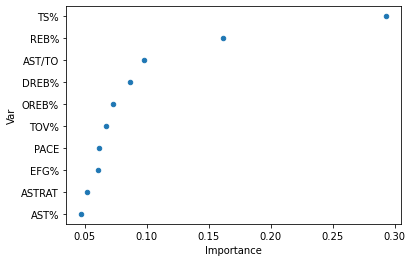

In [284]:
temp.plot.scatter('Importance', 'Var')

Feature: 0, Score: 0.00660
Feature: 1, Score: 0.29037
Feature: 2, Score: 0.04570
Feature: 3, Score: 0.08861
Feature: 4, Score: 0.07314
Feature: 5, Score: 0.30450
Feature: 6, Score: 0.03883
Feature: 7, Score: 0.08863
Feature: 8, Score: 0.06362


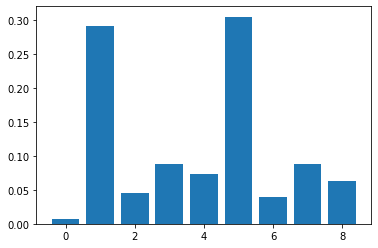

In [249]:
importance = clft.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [237]:
importance.sort()

In [250]:
importance

array([0.00659896, 0.29037141, 0.04570097, 0.08860581, 0.07314298,
       0.30450245, 0.03882786, 0.08862623, 0.06362334])

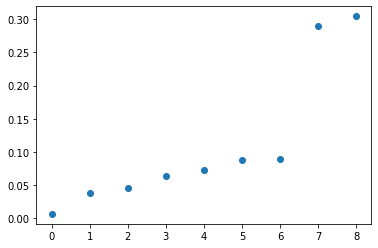

In [241]:
pyplot.scatter([x for x in range(len(importance))], importance)
pyplot.show()

In [233]:
accuracy_score(y4_test, list(map(round, clft.predict(x4_test))))

0.7975077881619937